# Cálculo de Tempos & Movimentos - Demandas de Contratação CEHOJ

*   O objetivo desta análise exploratória é atualizar, de forma mais próxima à realidade, o Tempos & Movimentos gasto para tratar as demandas de Contratação de Empreendimento, na CEHOJ
*   Para isso, foram coletados os prazos gastos junto aos analistas, e, ao final, compilamos todos os resultados em um único arquivo Excel, que vamos usar pra ser analisado aqui.

In [ ]:
# Antes de tudo, vamos importar as Bibliotecas que vamos utilizar
 
import numpy as np
import pandas as pd

In [ ]:
# Puxando os dados do Excel

tempos_movimentos = pd.read_excel("tm_compilado.xlsx")

In [ ]:
# Preview das respostas dadas

tempos_movimentos

,Produto,Origem Recursos,Natureza,VP,Tempo Checklist,Tempo Operacional,Tempo Edicao Minuta,Tempo Adicional
0,Apoio à Produção COM PJ,SBPE,Habitacional,VINAT [SUMEP],00:47:00,00:25:00,00:42:00,NaN
1,Apoio à Produção COM PJ,SBPE,Habitacional,VINAT [SUMEP],00:49:00,00:27:00,00:40:00,NaN
2,Apoio à Produção COM PJ,SBPE,Habitacional,VINAT [SUMEP],00:45:00,00:30:00,00:45:00,NaN
3,Apoio à Produção COM PJ,SBPE,Habitacional,SEC [VINAT - SUNCO],00:40:00,00:20:00,00:34:00,NaN
4,Apoio à Produção COM PJ,FGTS,Habitacional,VINAT [SUMEP],00:50:00,00:15:00,00:44:00,NaN
...,...,...,...,...,...,...,...,...
191,Apoio à Produção COM PJ,SBPE,Habitacional,SEC [VINAT - SUNCO],00:48:00,00:41:00,00:30:00,01:23:00
192,Apoio à Produção COM PJ,FGTS,Habitacional,VINAT [SUMEP],00:48:00,01:08:00,00:45:00,00:33:00
193,Apoio à Produção COM PJ,FGTS,Habitacional,VINAT [SUMEP],00:49:00,00:36:00,00:38:00,00:32:00
194,PEC,SBPE,Habitacional,VINAT [SUMEP],01:58:00,01:02:00,01:42:00,00:28:00


In [ ]:
tempos_movimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Produto              196 non-null    object
 1   Origem Recursos      196 non-null    object
 2   Natureza             196 non-null    object
 3   VP                   196 non-null    object
 4   Tempo Checklist      196 non-null    object
 5   Tempo Operacional    196 non-null    object
 6   Tempo Edicao Minuta  192 non-null    object
 7   Tempo Adicional      109 non-null    object
dtypes: object(8)
memory usage: 12.4+ KB


*   Temos 196 respostas dadas pelos analistas, com as quais faremos nossa análise

In [ ]:
# Vamos observar se existem colunas com valores não preenchidos

tempos_movimentos.isnull().sum()

Produto                 0
Origem Recursos         0
Natureza                0
VP                      0
Tempo Checklist         0
Tempo Operacional       0
Tempo Edicao Minuta     4
Tempo Adicional        87
dtype: int64

*   Temos 4 respostas com valor não preenchido para Tempo de Edição de Minuta, e 87 com valor não preenchido para a coluna de Tempo Adicional (esta última, de preenchimento não obrigatório)
*   É importante tratar os dados faltantes para que a análise fique mais próxima possível da realidade. Ao lidar com cada uma dessas colunas separadamente, mais adiante, vamos identificar qual a melhor estratégia para lidar com esses dados faltantes

In [ ]:
# Antes de começar, vamos renomear as colunas pra facilitar a manipulação dos dados

tempos_movimentos.rename(columns={'Produto' : 'produto',
                                  'Origem Recursos' : 'OR',
                                  'Natureza' : 'natureza',
                                  'VP' : 'VP',
                                  'Tempo Checklist' : 'tm_checklist',
                                  'Tempo Operacional' : 'tm_operacional',
                                  'Tempo Edicao Minuta' : 'tm_minuta',
                                  'Tempo Adicional' : 'tm_adicional'}, inplace=True)

## **Produto :** Produtos HAB PJ contratados pela CEHOJ

> Abaixo, consta a quantidade de registros em nossa amostra, distribuída por Produto

In [ ]:
# Converter os dados da coluna para análise 

tempos_movimentos['produto'] = tempos_movimentos['produto'].astype(str)

In [ ]:
tempos_movimentos['produto'].value_counts()

Apoio à Produção COM PJ    178
PEC                         14
Alocação de Recursos         2
Apoio à Produção SEM PJ      2
Name: produto, dtype: int64

## **OR :** Origem de Recurso das operações contratadas

> Abaixo, consta a quantidade de registros em nossa amostra, distribuída por Origem de Recursos

In [ ]:
# Converter os dados da coluna para análise 

tempos_movimentos['OR'] = tempos_movimentos['OR'].astype(str)

In [ ]:
tempos_movimentos['OR'].value_counts()

SBPE    106
FGTS     90
Name: OR, dtype: int64

Vamos dividi-las abaixo entre os Produtos existentes:

In [ ]:
pd.DataFrame( tempos_movimentos.groupby(['OR', 'produto']).size(), columns=['quantidade'] )

quantidade
OR   produto                            
FGTS Alocação de Recursos              2
     Apoio à Produção COM PJ          87
     Apoio à Produção SEM PJ           1
SBPE Apoio à Produção COM PJ          91
     Apoio à Produção SEM PJ           1
     PEC                              14

*   Operações de Apoio à Produção estão praticamente divididas entre OR FGTS e SBPE (87 x 91)
*   Operações PEC temos apenas SBPE, conforme norma vigente, enquanto Alocação de Recursos, somente FGTS



## **Natureza:** empreendimento Habitacional ou Misto

> Abaixo, consta a quantidade de registros em nossa amostra, distribuída por Natureza

In [ ]:
# Converter os dados da coluna para análise 

tempos_movimentos['natureza'] = tempos_movimentos['natureza'].astype(str)

In [ ]:
tempos_movimentos['natureza'].value_counts()

Habitacional    196
Name: natureza, dtype: int64

*   Não temos nenhuma resposta referente a empreendimento Misto, portanto, vamos excluir esta coluna pra fins de facilitar a análise, considerando que 100% das respostas se tratam de empreendimentos Habitacionais.



In [ ]:
tempos_movimentos.drop(['natureza'], axis = 1, inplace = True) 

## **VP :** Vice Presidência / Superintendência que contratou a operação

> Abaixo, consta a quantidade de registros em nossa amostra, distribuída por VP / Superintendência

In [ ]:
# Converter os dados da coluna para análise 

tempos_movimentos['VP'] = tempos_movimentos['VP'].astype(str)

In [ ]:
tempos_movimentos['VP'].value_counts()

VINAT [SUMEP]            108
SEC [VINAT - SUNCO]       72
VIRED RS / GO [SUMEP]     16
Name: VP, dtype: int64

*   Temos aqui 180 operações da VINAT e 16 operações VIRED (entre RS e GO)
*   Vamos comparar a quantidade entre as Modalidades e Origens de Recursos

In [ ]:
pd.DataFrame( tempos_movimentos.groupby(['VP', 'produto', 'OR'] ).size() , columns=['quantidade'] )

quantidade
VP                    produto                 OR              
SEC [VINAT - SUNCO]   Alocação de Recursos    FGTS           1
                      Apoio à Produção COM PJ FGTS          37
                                              SBPE          33
                      PEC                     SBPE           1
VINAT [SUMEP]         Apoio à Produção COM PJ FGTS          43
                                              SBPE          50
                      Apoio à Produção SEM PJ FGTS           1
                                              SBPE           1
                      PEC                     SBPE          13
VIRED RS / GO [SUMEP] Alocação de Recursos    FGTS           1
                      Apoio à Produção COM PJ FGTS           7
                                              SBPE           8

*   As operações de Apoio à Produção continuam sendo as mais distribuídas entre as VPs, estando a VINAT / SUNCO representada com 70 operações; VINAT / SUMEP com 95 (entre propostas COM e SEM PJ) e a VIRED / SUMEP (RS e GO apenas) com 15
*   As propostas PEC estão em sua maioria na VINAT / SUMEP
*   Na prática, a VIRED possui um considerável número de operações PEC, porém nossa amostra não contou com nenhuma delas 





## **Tempo Checklist :** tempo gasto para análise e checklist das propostas

In [ ]:
# Converter os dados da coluna em minutos, para análise 

tempos_movimentos['tm_checklist'] = tempos_movimentos['tm_checklist'].apply( lambda x : x.hour * 60  +  x.minute  +  x.second / 60 )

*   Como sabemos que as operações têm diferentes tempos de execução entre si, vamos calcular seus valores e mostrá-los de forma separada por produto, origem de recursos e vice presidências, assim teremos uma visão mais completa dos prazos gastos pras demandas, e como elas se diferenciam entre si.

###   **Panorama Geral**

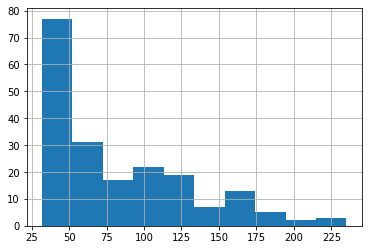

In [ ]:
tempos_movimentos['tm_checklist'].hist()

*   Podemos observar, pelo gráfico, que os valores de tempo gasto para as demandas, na etapa de checklist, não formam a chamada Distribuição Normal (ou seja, distribuição homogênea), que seria uma maior quantidade de valores distribuídos ao decorrer do gráfico. Ao invés disso, temos uma maior quantidade de valores mais pendentes para a esquerda
*   Com isso, para chegarmos a um valor mais justo para o cálculo de tempo gasto na etapa de checklist, é **recomendável utilizar a MEDIANA da amostra, ao invés da comumente utilizada média, pois a medida é mais indicada para retratar casos onde os dados se distribuem de uma forma mais heterogênea**
*   Nestes casos, caso ainda optassemos pelo uso da média, deveríamos retirar os *outliers* existentes para o cálculo, porém, como não temos uma distribuição normal, ainda assim esse valor tende a ficar relativamente longe do valor da mediana
*   Vejamos abaixo algumas informações que os dados nos mostram:

In [ ]:
tempos_movimentos['tm_checklist'].describe()

count    196.000000
mean      82.841837
std       46.732523
min       32.000000
25%       45.000000
50%       61.000000
75%      111.500000
max      235.000000
Name: tm_checklist, dtype: float64

*   A etapa de checklist demora, no mínimo, 30 minutos de execução
*   Em 1/4 da amostra, o checklist durou 45 minutos ou menos pra ser realizado
*   50% das vezes, o checklist demora até 1 hora pra ser feito (61 minutos)
*   **Da mesma maneira, metade das operações demoraram mais de 1h na etapa de checklist**
*   **25% das operações dentro da amostra demoraram mais que 1h50min para serem feitas (isto é, 75% do total < que 111 minutos)**

> Presença de *Outliers*

*   Em uma análise desta natureza, é importante observarmos a presença de *outliers*, que são aqueles registros que destoam muito do restante das observações. Isso porque a presença destes registros pode distorcer a resposta que estamos buscando : um valor fiel para o prazo gasto, em média, na execução das demandas de Contratação

In [ ]:
q1 = tempos_movimentos['tm_checklist'].quantile(0.25)
q3 = tempos_movimentos['tm_checklist'].quantile(0.75)

IQR = q3 - q1

In [ ]:
outliers = q3 + 1.5 * IQR
outliers

211.25

*   Quando consideramos 100% de nossa amostra, aquelas propostas com mais de 211.25 minutos de execução na etapa de checklist são considerados nossos outliers. Vejamos quais são eles ...

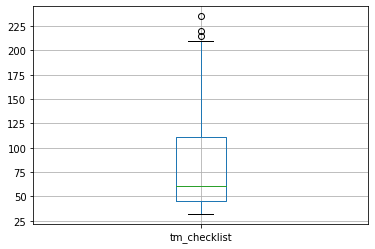

In [ ]:
tempos_movimentos.boxplot(column=['tm_checklist'])

*   Olhando pelo gráfico, temos 3 operações com prazo de 'checklist' considerados *outliers*

In [ ]:
tempos_movimentos.loc[tempos_movimentos['tm_checklist'] >= 211.25, ['produto', 'OR', 'VP', 'tm_checklist']]

,produto,OR,VP,tm_checklist
77,Apoio à Produção COM PJ,SBPE,VINAT [SUMEP],215.0
148,PEC,SBPE,VINAT [SUMEP],220.0
167,PEC,SBPE,VINAT [SUMEP],235.0


*   Trata-se de 3 operações SBPE da VINAT / SUMEP, sendo um Apoio à Produção com PJ e outros 2 PECs
*   Importante notar que esse limite vai mudar quando selecionamos apenas algumas partes específicas do conjunto. Por exemplo, quando dividimos as respostas por produto, VP, ou OR, seus *outliers* terão um ponto de corte diferente.

---


*   Agora vamos esmiuçar os registros da amostra dividindo-os entre Produto, Origem de Recurso e Vice Presidência, pra enxergar como estes prazos se comportam separadamente entre si. 

### **Comparativos**

#### Apoio à Produção COM PJ

In [ ]:
tm_apoio_compj = tempos_movimentos[tempos_movimentos['produto'] == 'Apoio à Produção COM PJ']

In [ ]:
def media_exceto_outliers(conjunto):
  q1 = conjunto.quantile(0.25)
  q3 = conjunto.quantile(0.75)

  IQR = q3 - q1
  outliers = q3 + 1.5 * IQR

  return round( conjunto[conjunto < outliers].mean(), 2 )

In [ ]:
tm_apoio_compj.groupby(['OR', 'VP']).agg({'tm_checklist': [('Mediana', 'median'), ('Média s/ Outliers', lambda x : media_exceto_outliers(x))]})

tm_checklist                  
                                Mediana Média s/ Outliers
OR   VP                                                  
FGTS SEC [VINAT - SUNCO]           45.0             50.61
     VINAT [SUMEP]                 96.0             95.88
     VIRED RS / GO [SUMEP]         60.0             71.00
SBPE SEC [VINAT - SUNCO]           45.0             46.97
     VINAT [SUMEP]                 95.0            100.44
     VIRED RS / GO [SUMEP]         93.5             99.12

**Prazos medianos na etapa de 'checklist' Apoio à Produção COM PJ**

*   SEC : 45 minutos, sendo FGTS ou SBPE
*   VINAT / SUMEP  : aprox. 95 minutos, FGTS ou SBPE
*   VIRED [RS e GO]  : 60 minutos pra FGTS, e aprox. 95 pra SBPE



#### PEC

In [ ]:
tm_pec = tempos_movimentos[tempos_movimentos['produto'] == 'PEC']

In [ ]:
tm_pec.groupby(['OR', 'VP']).agg({'tm_checklist': [('Mediana', 'median'), ('Média s/ Outliers', lambda x : media_exceto_outliers(x))]})

tm_checklist                  
                              Mediana Média s/ Outliers
OR   VP                                                
SBPE SEC [VINAT - SUNCO]        100.0               NaN
     VINAT [SUMEP]              118.0            128.85

OBS.: Como só temos 1 único PEC da SEC, não há cálculo de *oultiers* neste caso, sendo a Média igual à Mediana

**Prazos medianos na etapa de 'checklist' PEC**

*   SEC : 100 minutos
*   VINAT / SUMEP  : aprox. 120 minutos
*   VIRED [RS e GO]  : sem amostras



## **Tempo Operacional :** tempo gasto para operacionalizar a proposta no sistema

In [ ]:
# Converter os dados da coluna em minutos, para análise 

tempos_movimentos['tm_operacional'] = tempos_movimentos['tm_operacional'].apply( lambda x : x.hour * 60  +  x.minute  +  x.second / 60 )

###   **Panorama Geral**

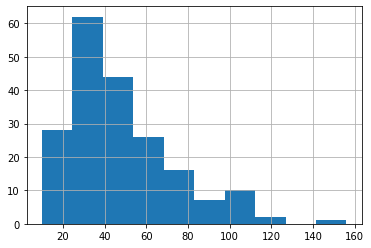

In [ ]:
tempos_movimentos['tm_operacional'].hist()

*   Observamos aqui que os dados estão distribuídos de forma mais homogênea que na etapa anterior de checklist, isto porque a fase de cadastramento da proposta no SIOPI tem menor variação entre os tipos de produto existentes
*   Ainda vamos continuar calculando a Mediana e a Média (retirando os *outliers*), paara observar como os valores se comportam
*   Vejamos abaixo algumas informações que os dados nos mostram:

In [ ]:
tempos_movimentos['tm_operacional'].describe()

count    196.000000
mean      46.979592
std       24.786878
min       10.000000
25%       27.000000
50%       41.000000
75%       56.250000
max      156.000000
Name: tm_operacional, dtype: float64

*   O menor prazo de operacionalização demorou 10 minutos [Alocação de Recursos]
*   Em 1/4 da amostra, o operacional durou até aproximadamente 25 minutos pra ser realizado
*   50% das vezes, o operacional demora em torno de 40 minutos pra ser feito
*   **25% das operações da amostra demoraram mais que 1h para serem feitas (mais que 56 minutos, pra ser mais exato)**

> Presença de *Outliers*

In [ ]:
q1 = tempos_movimentos['tm_operacional'].quantile(0.25)
q3 = tempos_movimentos['tm_operacional'].quantile(0.75)

IQR = q3 - q1

In [ ]:
outliers = q3 + 1.5 * IQR
outliers

100.125

*   Quando consideramos 100% de nossa amostra, aquelas propostas com mais de 100 minutos de execução na etapa de checklist são considerados nossos outliers. Vejamos quais são eles ...

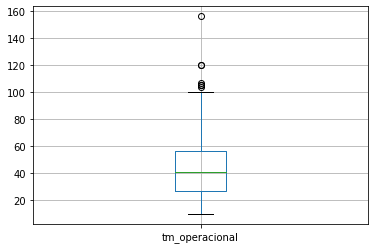

In [ ]:
tempos_movimentos.boxplot(column=['tm_operacional'])

*   Olhando pelo gráfico, temos várias propostas com prazo de 'operacionalização' considerados *outliers*.
*   Isso é esperável, visto que os dados estão mais próximos entre si, então aqueles que são um pouco maiores que a média, já são considerados *outliers*

In [ ]:
tempos_movimentos.loc[tempos_movimentos['tm_operacional'] >= 100.125, ['produto', 'OR', 'VP', 'tm_operacional']]

,produto,OR,VP,tm_operacional
51,Apoio à Produção COM PJ,FGTS,VINAT [SUMEP],156.0
52,Apoio à Produção COM PJ,FGTS,VINAT [SUMEP],107.0
53,Apoio à Produção COM PJ,FGTS,VINAT [SUMEP],105.0
55,Apoio à Produção COM PJ,FGTS,VINAT [SUMEP],120.0
60,Apoio à Produção COM PJ,FGTS,VINAT [SUMEP],104.0
61,Apoio à Produção COM PJ,FGTS,VINAT [SUMEP],120.0
146,Apoio à Produção COM PJ,SBPE,VIRED RS / GO [SUMEP],105.0
147,Apoio à Produção COM PJ,SBPE,VINAT [SUMEP],105.0


*   Trata-se de 8 operações, sendo 6 delas propostas FGTS da VINAT / SUMEP

---


*   Agora vamos dividir os registros da amostra entre Produto, Origem de Recurso e Vice Presidência, pra enxergar como estes prazos se comportam separadamente entre si. 

### **Comparativos**

#### Apoio à Produção COM PJ

In [ ]:
tm_apoio_compj = tempos_movimentos[tempos_movimentos['produto'] == 'Apoio à Produção COM PJ']

In [ ]:
tm_apoio_compj.groupby(['OR', 'VP']).agg({'tm_operacional': [('Mediana', 'median'), ('Média s/ Outliers', lambda x : media_exceto_outliers(x))]})

tm_operacional                  
                                  Mediana Média s/ Outliers
OR   VP                                                    
FGTS SEC [VINAT - SUNCO]             38.0             37.73
     VINAT [SUMEP]                   55.0             62.26
     VIRED RS / GO [SUMEP]           35.0             34.00
SBPE SEC [VINAT - SUNCO]             32.0             34.85
     VINAT [SUMEP]                   41.5             44.17
     VIRED RS / GO [SUMEP]           39.5             53.25

Observamos aqui valores de Média (sempre sem os *outliers*) mais próximos dos valores de Mediana

**Prazos medianos na etapa de 'checklist' Apoio à Produção COM PJ**

*   SEC : aprox. 40 minutos pra operações FGTS e aprox. 30 pra SBPE
*   VINAT / SUMEP  : aprox. 55 minutos com FGTS e 40 em SBPE
*   VIRED [RS e GO]  : aprox. 35 minutos FGTS, e aprox. 40 pra SBPE

---
*   Como são valores diferentes porém pouco distantes entre si, podemos fazer uma média entre eles, sugerindo assim um prazo GLOBAL (todas VPs) de aprox. 45 minutos para FGTS e 35 SBPE

#### PEC

In [ ]:
tm_pec = tempos_movimentos[tempos_movimentos['produto'] == 'PEC']

In [ ]:
tm_pec.groupby(['OR', 'VP']).agg({'tm_operacional': [('Mediana', 'median'), ('Média s/ Outliers', lambda x : media_exceto_outliers(x))]})

tm_operacional                  
                                Mediana Média s/ Outliers
OR   VP                                                  
SBPE SEC [VINAT - SUNCO]           70.0               NaN
     VINAT [SUMEP]                 55.0             57.23

OBS.: Como só temos 1 único PEC da SEC, não há cálculo de *oultiers* neste caso, sendo a Média igual à Mediana

**Prazos medianos na etapa de 'checklist' PEC**

*   SEC : 70 minutos
*   VINAT / SUMEP  : 55 minutos
*   VIRED [RS e GO]  : sem amostras

